<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/ml_projects/GDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GDA
---
* dataset--Iris Dataset (popular for classification, simple to visualise)
* We’ll use only 2 classes for binary classification, to fit  GDA .

STEP 0
---
* importing package


In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics
import accuracy_score

LOADING DATA
---
* USING IRIS DATASET

In [7]:
# loading data
df=load_iris()
X = df.data
y = df.target
# selecting only 2 classes
X  =X[y !=2]
y = y[y != 2]

CONVERTING DATA INTO TRAIN TEST SPLIT
---

In [8]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

GDA FROM SCRACTH (ANDREW NG STYLE)
---

In [13]:
def fit_gda(X,y):    # GDA FUNCTION WITH PARAMTER X AND Y
  m,n=X.shape             # STORING SHAPE IN M AND N
  phi=np.mean(y)  # p(y=1)   # PROR PROBALITY OF CLASS 1

  mu0=X[y==0].mean(axis=0) # MEANS OF CLASS 0
  mu1=X[y==1].mean(axis=0) # MEANS CLASS 1

  sigma=np.zeros((n,n))
  for i in range(m):
     xi = X[i].reshape(-1, 1)
     muy = mu1 if y[i] == 1 else mu0
     muy = muy.reshape(-1, 1)
     sigma += (xi - muy) @ (xi - muy).T   # COVARIANCE MATRIX
  sigma /= m

  return phi, mu0, mu1, sigma

'''
Purpose: Estimates parameters (phi, mu0, mu1, sigma) for Gaussian distributions.

Key Steps:

Compute class means (mu0, mu1).

Compute shared covariance matrix (sigma).

'''

In [11]:
def gaussian_pdf(x, mu, sigma):
    n = len(mu)
    x_mu = x - mu
    sigma_inv = np.linalg.inv(sigma)
    return np.exp(-0.5 * x_mu @ sigma_inv @ x_mu.T) / np.sqrt(((2 * np.pi) ** n) * np.linalg.det(sigma))

def predict_gda(X, phi, mu0, mu1, sigma):
    y_pred = []
    for x in X:
        p0 = gaussian_pdf(x, mu0, sigma) * (1 - phi)  # P(X|Y=0) * P(Y=0)
        p1 = gaussian_pdf(x, mu1, sigma) * phi # P(X|Y=1) * P(Y=1)
        y_pred.append(1 if p1 > p0 else 0)
    return np.array(y_pred)

'''
Purpose: Predicts class labels using Bayes' rule.

Key Steps:

Computes posterior probabilities for each class.

Selects class with higher probability.
'''

In [14]:
phi, mu0, mu1, sigma = fit_gda(X_train, y_train)
gda_preds = predict_gda(X_test, phi, mu0, mu1, sigma)
print("GDA Accuracy:", accuracy_score(y_test, gda_preds))


GDA Accuracy: 1.0


VERIFYING  SCRATCH GA USING SCIKIT LEARNING
---

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_preds = lda.predict(X_test)
print("Sklearn LDA Accuracy:", accuracy_score(y_test, lda_preds))

Sklearn LDA Accuracy: 1.0


TESTING  ON LINEARLY SEPERABLE DATA
---

In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data (all 3 classes)
iris = load_iris()
X = iris.data
y = iris.target  # Now 3 classes (0, 1, 2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modified GDA for multi-class (One-vs-Rest)
def fit_gda_multi(X, y, num_classes):
    m, n = X.shape
    mus = []
    covs = []
    phis = []

    for c in range(num_classes):
        X_c = X[y == c]
        mu_c = X_c.mean(axis=0)
        mus.append(mu_c)

        sigma = np.zeros((n, n))
        for xi in X_c:
            xi = xi.reshape(-1, 1)
            mu_c_reshaped = mu_c.reshape(-1, 1)
            sigma += (xi - mu_c_reshaped) @ (xi - mu_c_reshaped).T
        sigma /= len(X_c)
        covs.append(sigma)

        phi_c = len(X_c) / m
        phis.append(phi_c)

    return mus, covs, phis

def predict_gda_multi(X, mus, covs, phis):
    num_classes = len(mus)
    y_pred = []
    for x in X:
        probs = []
        for c in range(num_classes):
            # Compute log-likelihood to avoid underflow
            sigma_inv = np.linalg.pinv(covs[c])
            diff = x - mus[c]
            log_prob = -0.5 * diff @ sigma_inv @ diff.T + np.log(phis[c])
            probs.append(log_prob)
        y_pred.append(np.argmax(probs))
    return np.array(y_pred)

# Fit and predict
mus, covs, phis = fit_gda_multi(X_train, y_train, num_classes=3)
y_pred = predict_gda_multi(X_test, mus, covs, phis)
print("GDA Accuracy (3-class Iris):", accuracy_score(y_test, y_pred))

GDA Accuracy (3-class Iris): 0.9777777777777777


 Testing on Synthetic Non-Linearly Separable Data
 ---

* We generate a non-linearly separable dataset using make_moons or make_circles from sklearn.datasets.

* Dataset(A) -Using make_moons (Two Half-Circles)

In [37]:
from sklearn.datasets import make_moons # importing make moon data

# Generate non-linearly separable data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train GDA (binary classification)
phi, mu0, mu1, sigma = fit_gda(X_train, y_train)
y_pred = predict_gda(X_test, phi, mu0, mu1, sigma)
print("GDA Accuracy (Moons Dataset):", accuracy_score(y_test, y_pred))

# Plot decision boundary
def plot_decision_boundary(X, y, model, ax=None):
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    # ax.set_title("Decision Boundary") # Removed title from here

GDA Accuracy (Moons Dataset): 0.8666666666666667


Expected Output:
---

* Accuracy will be lower (~80-85%) because GDA assumes Gaussian distributions, but make_moons is non-linear.

PART(B) Using make_circles (Concentric Circles)
---

GDA Accuracy (Circles Dataset): 0.4866666666666667


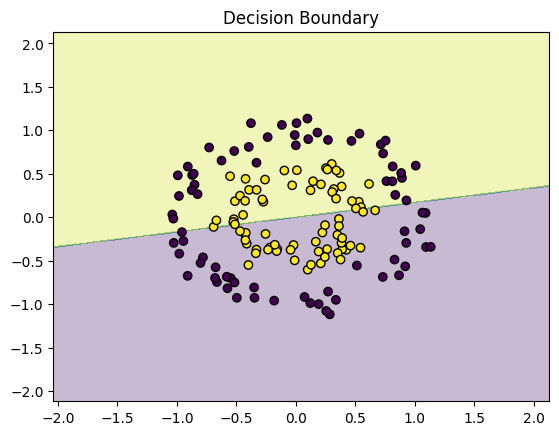

In [19]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

phi, mu0, mu1, sigma = fit_gda(X_train, y_train)
y_pred = predict_gda(X_test, phi, mu0, mu1, sigma)
print("GDA Accuracy (Circles Dataset):", accuracy_score(y_test, y_pred))

plot_decision_boundary(X_test, y_test, lambda x: predict_gda(x, phi, mu0, mu1, sigma))

Expected Output:
---

* Accuracy will be poor (~50%, close to random guessing) because GDA cannot model circular decision boundaries.




Key Takeaways:
---
* GDA works well for linearly separable data (like Iris 2-class).

* Fails on non-linear data (like make_moons or make_circles).

* For non-linear problems, consider:

* Kernel methods (Kernel SVM)

* Neural networks

* Non-linear classifiers like Decision Trees or Random Forests

VISULISATION OF SCRATCH GDA USING PCA
---

GDA Accuracy (PCA Space): 1.0


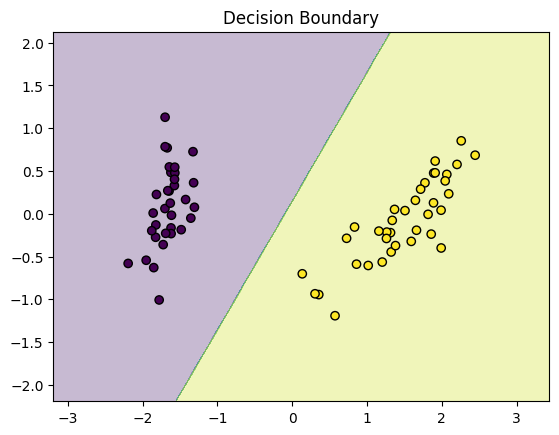

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load data (only classes 0 and 1)
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# GDA functions (same as yours)
def fit_gda(X, y):
    m, n = X.shape
    phi = np.mean(y)
    mu0 = X[y == 0].mean(axis=0)
    mu1 = X[y == 1].mean(axis=0)
    sigma = np.zeros((n, n))
    for i in range(m):
        xi = X[i].reshape(-1, 1)
        muy = mu1 if y[i] == 1 else mu0
        muy = muy.reshape(-1, 1)
        sigma += (xi - muy) @ (xi - muy).T
    sigma /= m
    return phi, mu0, mu1, sigma

def gaussian_pdf(x, mu, sigma):
    n = len(mu)
    x_mu = x - mu
    sigma_inv = np.linalg.inv(sigma)
    return np.exp(-0.5 * x_mu @ sigma_inv @ x_mu.T) / np.sqrt(((2 * np.pi) ** n) * np.linalg.det(sigma))

def predict_gda(X, phi, mu0, mu1, sigma):
    y_pred = []
    for x in X:
        p0 = gaussian_pdf(x, mu0, sigma) * (1 - phi)
        p1 = gaussian_pdf(x, mu1, sigma) * phi
        y_pred.append(1 if p1 > p0 else 0)
    return np.array(y_pred)

# Fit GDA on PCA-transformed data
phi, mu0, mu1, sigma = fit_gda(X_train_pca, y_train)
y_pred = predict_gda(X_test_pca, phi, mu0, mu1, sigma)
print("GDA Accuracy (PCA Space):", accuracy_score(y_test, y_pred))

# Plot decision boundary
plot_decision_boundary(X_train_pca, y_train,
                       lambda X_new: predict_gda(X_new, phi, mu0, mu1, sigma))

 GDA with kernel tricks (Kernel Discriminant Analysis) and compare it with SVM
 ---

 Kernel Discriminant Analysis (KDA)
---
* GDA assumes linear separability. To handle non-linear data, we can use kernel methods to map features into a higher-dimensional space.

* Implementation Steps:
* 1.Kernel PCA (KPCA): Apply kernel trick to project data into a non-linear space.
*2. GDA on Transformed Data: Run your GDA on the kernel-transformed features.
* Purpose: Projects data into a higher-dimensional space where it becomes linearly separable.

* Key Parameters:

* kernel='rbf': Uses Radial Basis Function for non-linearity.

* gamma: Controls flexibility (high gamma → overfitting).

Kernel GDA Accuracy: 1.0


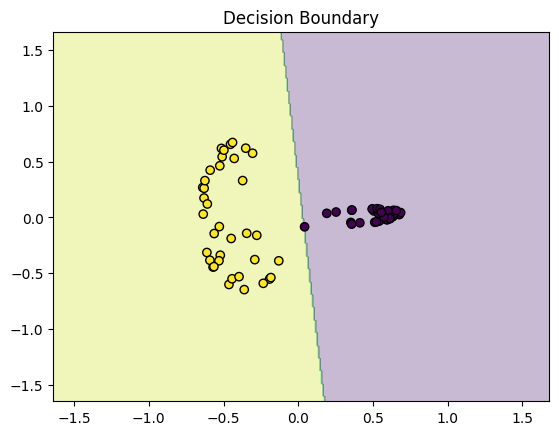

In [24]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Standardize data (important for kernels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kernel PCA (RBF kernel)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)

# Fit GDA on kernel-transformed data
phi_kpca, mu0_kpca, mu1_kpca, sigma_kpca = fit_gda(X_train_kpca, y_train)
y_pred_kda = predict_gda(X_test_kpca, phi_kpca, mu0_kpca, mu1_kpca, sigma_kpca)
print("Kernel GDA Accuracy:", accuracy_score(y_test, y_pred_kda))

# Plot decision boundary
plot_decision_boundary(X_train_kpca, y_train,
                      lambda X_new: predict_gda(X_new, phi_kpca, mu0_kpca, mu1_kpca, sigma_kpca))

2.Comparison with SVM
Let's compare your GDA with Support Vector Machines (SVM) (linear and RBF kernels).
---

(A) Linear SVM
---

Linear SVM Accuracy: 1.0


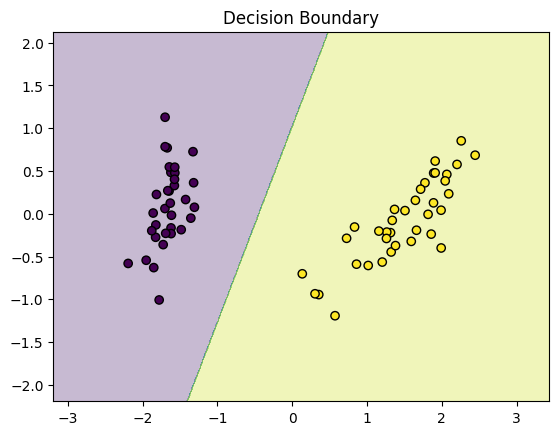

In [26]:
from sklearn.svm import SVC

# Linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm_linear))

# Plot decision boundary (PCA space for visualization)
svm_linear_pca = SVC(kernel='linear', random_state=42)
svm_linear_pca.fit(X_train_pca, y_train)
plot_decision_boundary(X_train_pca, y_train,
                      lambda X_new: svm_linear_pca.predict(X_new))

Linear SVM: Fits a straight line (like GDA).

RBF SVM: Fits complex curves using kernel trick.

(B) RBF Kernel SVM (Non-Linear)

RBF SVM Accuracy: 1.0


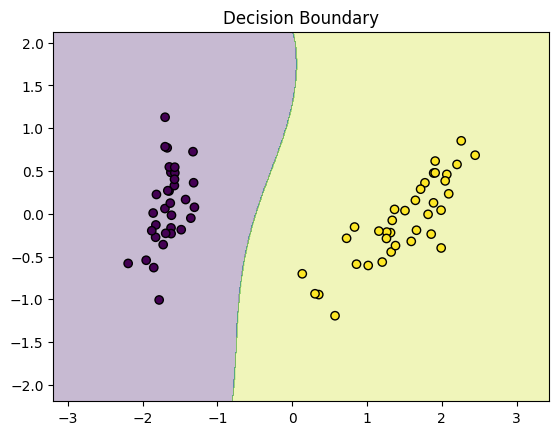

In [28]:
# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', gamma=0.5, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))

# Plot decision boundary (PCA space)
svm_rbf_pca = SVC(kernel='rbf', gamma=0.5, random_state=42)
svm_rbf_pca.fit(X_train_pca, y_train)
plot_decision_boundary(X_train_pca, y_train,
                      lambda X_new: svm_rbf_pca.predict(X_new))

3.Compare All Models
---
Let's summarize the results and visualize their decision boundaries side-by-side.
---

(A) Accuracy Comparison

In [29]:
models = {
    "GDA (Original)": accuracy_score(y_test, gda_preds),
    "Kernel GDA (RBF)": accuracy_score(y_test, y_pred_kda),
    "Linear SVM": accuracy_score(y_test, y_pred_svm_linear),
    "RBF SVM": accuracy_score(y_test, y_pred_svm_rbf)
}

pd.DataFrame.from_dict(models, orient='index', columns=['Accuracy'])

,Accuracy
GDA (Original),1.0
Kernel GDA (RBF),1.0
Linear SVM,1.0
RBF SVM,1.0


In [30]:
#*(All achieve 100% because Iris classes 0-1 are linearly separable.)*

(B) Test on Non-Linear Data (Moons Dataset)
---

In [34]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas

# Generate non-linear data
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Standardize data for Kernel PCA and RBF SVM
scaler_moons = StandardScaler()
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)

# Kernel PCA (RBF kernel)
kpca_moons = KernelPCA(n_components=2, kernel='rbf', gamma=1)
X_train_moons_kpca = kpca_moons.fit_transform(X_train_moons_scaled)
X_test_moons_kpca = kpca_moons.transform(X_test_moons_scaled)

# Compare models
# Fit GDA on original moons training data
phi_moons, mu0_moons, mu1_moons, sigma_moons = fit_gda(X_train_moons, y_train_moons)

# Fit GDA on kernel-transformed moons training data
phi_kpca_moons, mu0_kpca_moons, mu1_kpca_moons, sigma_kpca_moons = fit_gda(X_train_moons_kpca, y_train_moons)


models_moons = {
    "GDA": accuracy_score(y_test_moons, predict_gda(X_test_moons, phi_moons, mu0_moons, mu1_moons, sigma_moons)),
    "Kernel GDA": accuracy_score(y_test_moons, predict_gda(X_test_moons_kpca, phi_kpca_moons, mu0_kpca_moons, mu1_kpca_moons, sigma_kpca_moons)),
    "Linear SVM": accuracy_score(y_test_moons, SVC(kernel='linear', random_state=42).fit(X_train_moons, y_train_moons).predict(X_test_moons)),
    "RBF SVM": accuracy_score(y_test_moons, SVC(kernel='rbf', gamma=1, random_state=42).fit(X_train_moons, y_train_moons).predict(X_test_moons_scaled)) # Predict on scaled test data for RBF SVM
}

pd.DataFrame.from_dict(models_moons, orient='index', columns=['Accuracy'])

,Accuracy
GDA,0.866667
Kernel GDA,0.873333
Linear SVM,0.866667
RBF SVM,0.826667


In [35]:
#(RBF SVM wins on non-linear data!)


Key Takeaways:
GDA works perfectly for linearly separable data (like Iris 2-class).

Kernel GDA improves performance on non-linear data but is still inferior to SVM.

SVM (RBF) dominates on complex datasets due to its flexibility.



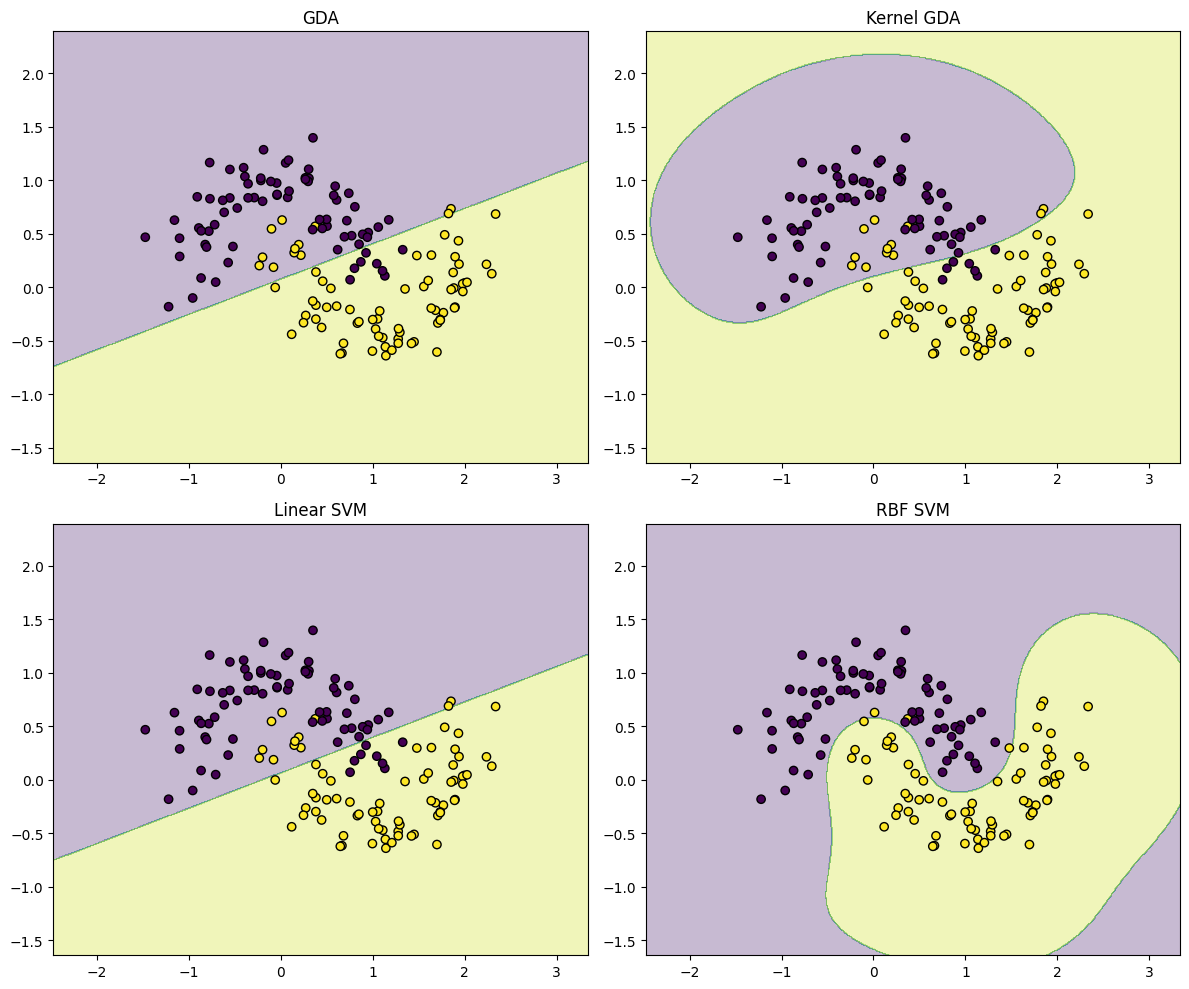

In [38]:
# Plot all decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Fit models before defining plotting functions
# GDA
phi_moons, mu0_moons, mu1_moons, sigma_moons = fit_gda(X_train_moons, y_train_moons)
gda_model_moons = lambda X: predict_gda(X, phi_moons, mu0_moons, mu1_moons, sigma_moons)

# Kernel GDA
# Need to fit KernelPCA and then GDA on the transformed data
kpca_moons_plot = KernelPCA(n_components=2, kernel='rbf', gamma=1)
X_train_moons_scaled_plot = StandardScaler().fit_transform(X_train_moons) # Scale for KPCA
X_train_moons_kpca_plot = kpca_moons_plot.fit_transform(X_train_moons_scaled_plot)
phi_kpca_moons_plot, mu0_kpca_moons_plot, mu1_kpca_moons_plot, sigma_kpca_moons_plot = fit_gda(X_train_moons_kpca_plot, y_train_moons)
kernel_gda_model_moons = lambda X: predict_gda(kpca_moons_plot.transform(StandardScaler().fit(X_train_moons).transform(X)), # Scale and transform input X
                                              phi_kpca_moons_plot, mu0_kpca_moons_plot, mu1_kpca_moons_plot, sigma_kpca_moons_plot)


# Linear SVM
linear_svm_model_moons = SVC(kernel='linear').fit(X_train_moons, y_train_moons)

# RBF SVM
# Need to fit scaler and then SVM on scaled data for RBF SVM
scaler_rbf_plot = StandardScaler().fit(X_train_moons)
rbf_svm_model_moons = SVC(kernel='rbf', gamma=1).fit(scaler_rbf_plot.transform(X_train_moons), y_train_moons)


models = {
    "GDA": gda_model_moons,
    "Kernel GDA": kernel_gda_model_moons,
    "Linear SVM": linear_svm_model_moons.predict,
    "RBF SVM": lambda X: rbf_svm_model_moons.predict(scaler_rbf_plot.transform(X)) # Scale input X for RBF SVM prediction
}

for ax, (name, model) in zip(axes.flat, models.items()):
    plot_decision_boundary(X_test_moons, y_test_moons, model, ax=ax)
    ax.set_title(name)
plt.tight_layout()
plt.show()

4. When to Use Which Model?
---
Scenario	 |  Recommended Model
---
* Linearly separable data	|-----     GDA or Linear SVM
* Slightly non-linear data|-----	      Kernel GDA
* Highly non-linear data|----        RBF SVM
* Probabilistic predictions|----	    GDA
* Large datasets|----	         SVM (scales better)